<a href="https://colab.research.google.com/github/angubaba/Osteoporosis-Detection-Usinng-X-Ray-Images/blob/main/Osteoporosis_test_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil  #comes under Python's standard utility modules. This module helps in automating the process of copying and removal of files and directories
import glob # glob (short for global) is used to return all file paths that match a specific pattern

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#Keras is a high-level, deep learning API developed by Google for implementing neural networks. 
import keras
from skimage import io # an open source Python package designed for image preprocessing
import os
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.models import load_model
from keras import backend as K
from keras.callbacks import ModelCheckpoint , EarlyStopping
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns #a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python

Data Visualization

In [ ]:
#data visualization
image_directory = '/content/drive/MyDrive/Dataset_ost/normal/normal'
SIZE = 256 #size nicchi 256x256
my_images = os.listdir(image_directory)
i = 0
img_list = []
for i, image_name in enumerate(my_images) :
  i = i+1;
  if i > 10: #first 9ta image list e append and then print
    break
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  img_list.append(img);


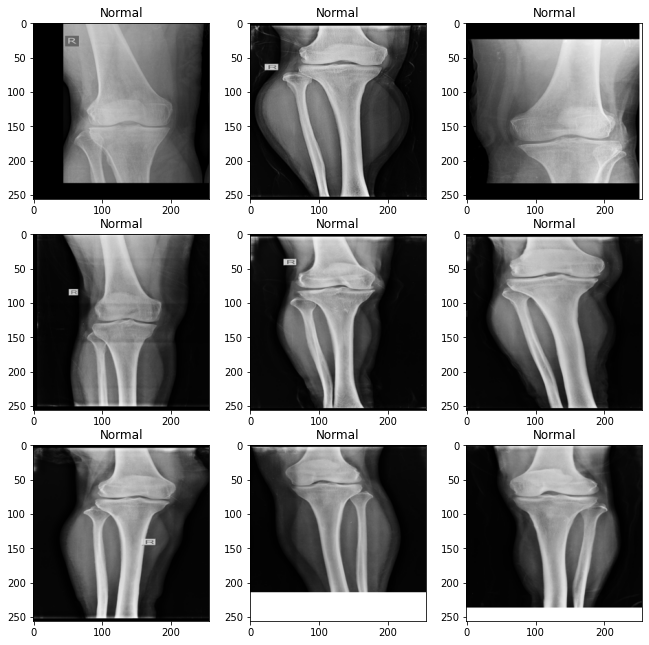

In [ ]:
#print
plt.figure(figsize=(11,11))
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.title('Normal')
  plt.imshow(img_list[i-1])

In [ ]:
image_directory = '/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis'
SIZE = 256
my_images = os.listdir(image_directory)
i = 0
img_list = []
for i, image_name in enumerate(my_images) :
  i = i+1;
  if i > 10:
    break
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  img_list.append(img);

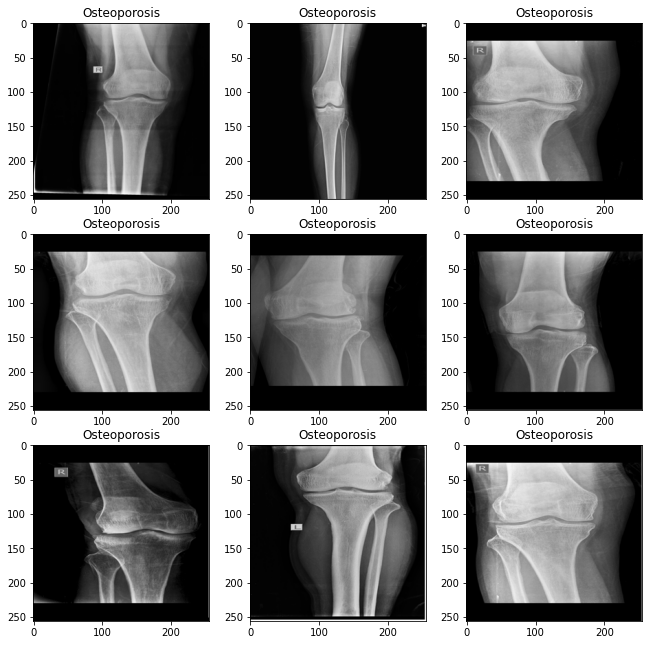

In [ ]:
plt.figure(figsize=(11,11))
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.title('Osteoporosis')
  plt.imshow(img_list[i-1])

Preprocessing Data using Data Generator

In [ ]:
#data augmentation prottek chobir jonno  3ta kore augment
train_datagen = ImageDataGenerator(featurewise_center= True , 
                                  rotation_range= 0.4, 
                                  width_shift_range= 0.3, 
                                  height_shift_range= 0.02,
                                  horizontal_flip= True, 
                                  preprocessing_function= preprocess_input, 
                                  zoom_range= 0.4, 
                                  shear_range= 0.4 )

%cd '/content/drive/MyDrive/Dataset_ost_augment/normal/normal/'
!rm ./*png
## Negative Augmentation
image_directory = '/content/drive/MyDrive/Dataset_ost/normal/normal'
SIZE = 256
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  dataset = []
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  x = img_to_array(img)
  x = x.reshape((1,)+x.shape)
    #print(x.shape)
    #image = io.imread(image_directory +'/'+ image_name)        
    #image = Image.fromarray(image, 'RGB')        
    #image = image.resize((SIZE,SIZE)) 
    #dataset.append(np.array(image))
    #x = np.array(dataset)
  i = 0
    #print(image_name)
  for batch in train_datagen.flow(x, batch_size=1,
                                save_to_dir='/content/drive/MyDrive/Dataset_ost_augment/normal/normal',
                                save_prefix= 'Aug',
                                save_format='png'):
    i += 1
    if i > 2:
      break


/content/drive/MyDrive/Dataset_ost_augment/normal/normal
rm: cannot remove './*png': No such file or directory


In [ ]:
%cd '/content/drive/MyDrive/Dataset_ost_augment/osteoporosis/osteoporosis'
!rm ./*png
## Positive augmentation
image_directory = '/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis'
SIZE = 256
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  dataset = []
  img = load_img(image_directory +'/'+ image_name)
  img = img.resize((SIZE,SIZE))
  x = img_to_array(img)
  x = x.reshape((1,)+x.shape)
    #print(x.shape)
    #image = io.imread(image_directory +'/'+ image_name)        
    #image = Image.fromarray(image, 'RGB')        
    #image = image.resize((SIZE,SIZE)) 
    #dataset.append(np.array(image))
    #x = np.array(dataset)
  i = 0
    #print(image_name)
  for batch in train_datagen.flow(x, batch_size=1,
                                save_to_dir='/content/drive/MyDrive/Dataset_ost_augment/osteoporosis/osteoporosis',
                                save_prefix= 'Aug',
                                save_format='png'):
    i += 1
    if i > 2:
      break

/content/drive/MyDrive/Dataset_ost_augment/osteoporosis/osteoporosis


In [ ]:
#augmented to create the dataset
train_datagen = ImageDataGenerator(featurewise_center= True , 
                                  rotation_range= 0.4, 
                                  width_shift_range= 0.3, 
                                  horizontal_flip= True, 
                                  preprocessing_function= preprocess_input,#of inception v3 
                                  zoom_range= 0.4, 
                                  shear_range= 0.4 )

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset_ost",
                                               target_size=(256,256),
                                               batch_size= 32)

Found 372 images belonging to 2 classes.


In [ ]:
train_data.class_indices #classification of the images

{'normal': 0, 'osteoporosis': 1}

Visualizing Augmented the data

In [ ]:
t_img , label = train_data.next() #works as an iterator of the dataset to visualize it, t_img amra dataset er augmented values

In [ ]:
t_img

array([[[[-0.9764706 , -0.9764706 , -0.9764706 ],
         [-0.9764706 , -0.9764706 , -0.9764706 ],
         [-0.9764706 , -0.9764706 , -0.9764706 ],
         ...,
         [-0.9843137 , -0.9843137 , -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.9843137 ]],

        [[-0.9764706 , -0.9764706 , -0.9764706 ],
         [-0.9764706 , -0.9764706 , -0.9764706 ],
         [-0.9764706 , -0.9764706 , -0.9764706 ],
         ...,
         [-0.9843137 , -0.9843137 , -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.9843137 ]],

        [[-0.9764706 , -0.9764706 , -0.9764706 ],
         [-0.9764706 , -0.9764706 , -0.9764706 ],
         [-0.9764706 , -0.9764706 , -0.9764706 ],
         ...,
         [-0.9843137 , -0.9843137 , -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.9843137 ]],

        ...,

        [[-0.9843137 , -0.9843137 , -0

In [ ]:
def plotImages(img_arr , label): # 
  """
  input : image array
  output : plot images
  """

  for idx , img in enumerate( img_arr ):

    if idx<=10 :
      plt.figure(figsize= (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


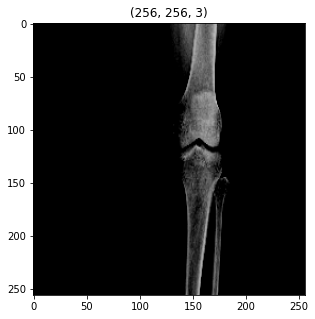

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


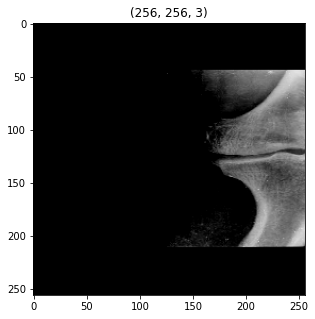

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


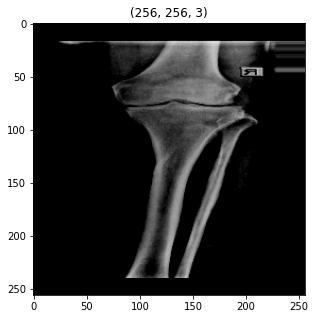

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


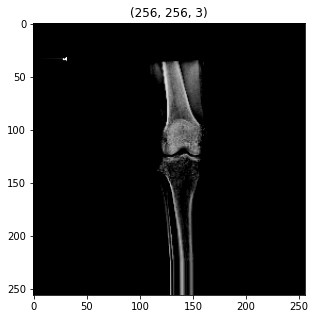

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


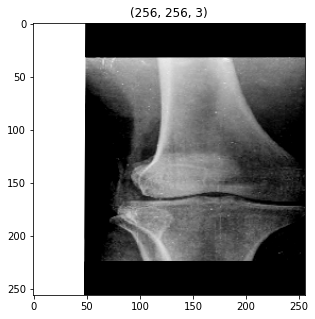

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


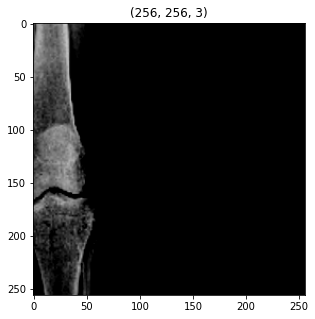

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


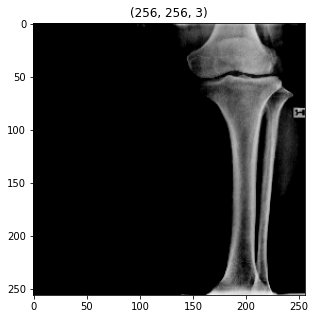

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


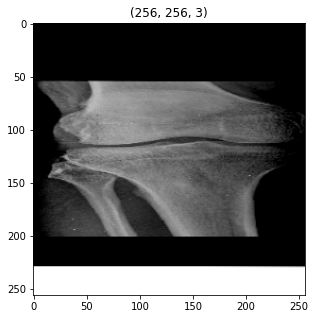

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


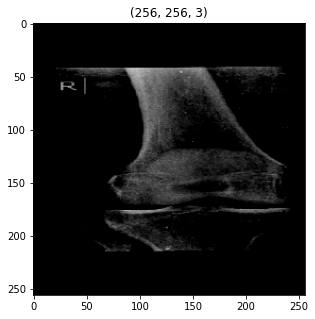

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


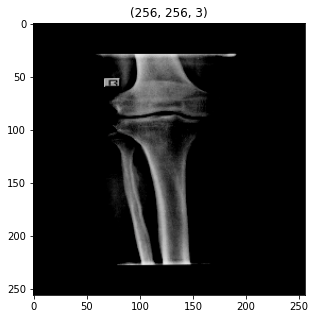

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


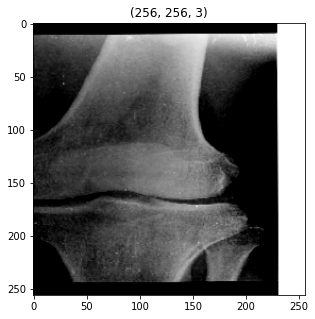

In [ ]:
plotImages(t_img, label) #augmeneted images er koyekta print

**Model Check Point**

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top = False) #size and rgb3 define kori inceptionv3 e.false kortesi tai output of previous layer passed through Globalaveragepooling to extract important features.

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Precision = TruePositives/ (TruePositives + FalsePostivives)

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
#output ta flatten then dense kortesi
X = Flatten()(base_model.output)
X = Dense(units=2 , activation= 'sigmoid')(X)

#Final Model
model = Model(base_model.input , X)

#Compile the model nicher eigula parameter
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy',precision_m])

#summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
#plot_model(model, to_file='model_train.png', show_shapes=True, show_layer_names=True)

In [ ]:
#model checkpoint hocche callback jeta saves the model after every epoch
mc = ModelCheckpoint(filepath= "./best_model.h5" ,
                     monitor="accuracy",
                     verbose=1,
                     save_best_only= True )
#a callback earlystopping overfitting jate na hoy model ta jeno stop kore ekta certain accuracy te
es = EarlyStopping(monitor= "accuracy",
                   min_delta= 0.01,#min accuracy difference
                   patience= 5,#5 epoch porjonto at least
                   verbose= 1)

cb= [mc,es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch= 10,
                          epochs=35,
                          callbacks= cb)

Epoch 1/35
10/10 [==============================] - ETA: 0s - loss: 1.5580 - accuracy: 0.7662 - precision_m: 0.7707
Epoch 00001: accuracy improved from 0.72312 to 0.76623, saving model to ./best_model.h5
10/10 [==============================] - 50s 5s/step - loss: 1.5580 - accuracy: 0.7662 - precision_m: 0.7707
Epoch 2/35
10/10 [==============================] - ETA: 0s - loss: 1.2592 - accuracy: 0.7987 - precision_m: 0.7820
Epoch 00002: accuracy improved from 0.76623 to 0.79870, saving model to ./best_model.h5
10/10 [==============================] - 50s 5s/step - loss: 1.2592 - accuracy: 0.7987 - precision_m: 0.7820
Epoch 3/35
10/10 [==============================] - ETA: 0s - loss: 0.8877 - accuracy: 0.7987 - precision_m: 0.7978
Epoch 00003: accuracy did not improve from 0.79870
10/10 [==============================] - 52s 5s/step - loss: 0.8877 - accuracy: 0.7987 - precision_m: 0.7978
Epoch 4/35
10/10 [==============================] - ETA: 0s - loss: 1.2260 - accuracy: 0.7565 - pr

In [ ]:
model = load_model("/content/drive/MyDrive/best_model.h5", compile= False) #loading base model

In [ ]:
model.compile()

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'precision_m'])

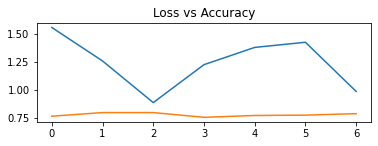

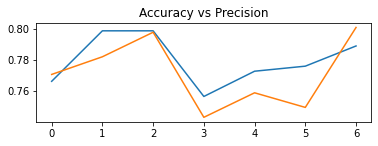

In [ ]:
plt.subplot(2,1,1)
plt.plot(h['loss'])
epochs = range(7)
plt.plot(epochs,h['accuracy']) 
plt.title("Loss vs Accuracy")
plt.show()

plt.subplot(2,1,2)
plt.plot(h['accuracy'] )
epochs = range(7)
plt.plot(epochs,h['precision_m']) 
plt.title("Accuracy vs Precision")
plt.show()

In [ ]:
lst_pred = []
lst_actual = []
## Normal
#image_directory = '/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis'
image_directory = '/content/drive/MyDrive/Dataset_ost_testing/normal/normal'
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  img = load_img(image_directory +'/'+ image_name)
  #img = load_img('/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis/94.JPEG')
  img = img.resize((256,256))
  i = img_to_array(img)
  i = preprocess_input(i)
  input_arr = np.array([i])
  input_arr.shape

  pred = np.argmax(model.predict(input_arr))
  lst_pred.append(pred)
  lst_actual.append(0);

## Osteoporosis
image_directory = '/content/drive/MyDrive/Dataset_ost_testing/osteoporosis/osteoporosis'
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images) :
  img = load_img(image_directory +'/'+ image_name)
  #img = load_img('/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis/94.JPEG')
  img = img.resize((256,256))
  i = img_to_array(img)
  i = preprocess_input(i)
  input_arr = np.array([i])
  input_arr.shape
  pred = np.argmax(model.predict(input_arr))
  lst_pred.append(pred)
  lst_actual.append(1);

y_pred = np.array(lst_pred)
y_actual = np.array(lst_actual)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#test_datagen = ImageDataGenerator( preprocessing_function= preprocess_input, 
                                  )

#test_data = test_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset_ost_testing",
                                               target_size=(256,256),
                                               batch_size= 1)

Found 41 images belonging to 2 classes.


In [ ]:
#y_prob = model.predict(test_data)
#y_pred = y_prob.argmax(axis=-1)
#y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
#y_actual = test_data.classes
#y_actual


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
conf_matrix = confusion_matrix(y_actual,y_pred) 
conf_matrix

array([[14,  6],
       [ 2, 19]])

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

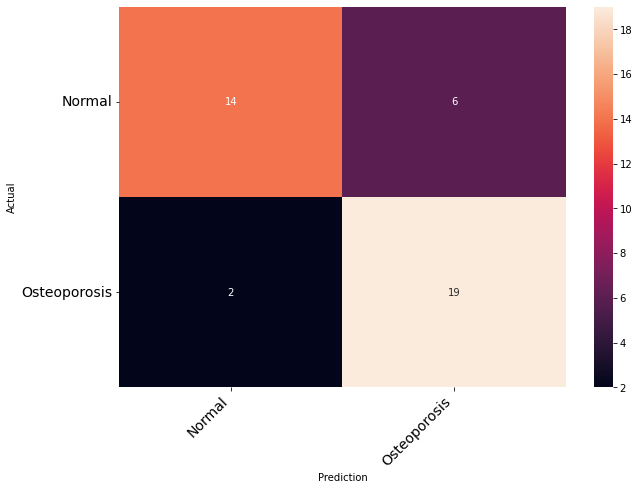

In [ ]:
cm = confusion_matrix(y_actual,y_pred)
print_confusion_matrix(cm,["Normal","Osteoporosis"])

In [ ]:
accuracy = accuracy_score(y_actual, y_pred)
print('Accuracy: %.3f' % accuracy)
precision = precision_score(y_actual, y_pred, average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y_actual, y_pred, average='binary')
print('Recall: %.3f' % recall)
score = f1_score(y_actual, y_pred, average='binary')
print('F-Measure: %.3f' % score)

Accuracy: 0.805
Precision: 0.760
Recall: 0.905
F-Measure: 0.826


#Individual Input

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Dataset_ost/normal/normal/39.jpg')
#img = cv2.imread('/content/drive/MyDrive/Dataset_ost/osteoporosis/osteoporosis/10.JPEG')
img = cv2.resize(img,(256,256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, 0)

In [ ]:
y = np.argmax(model.predict(img))
y

0

In [ ]:
img.shape

(1, 256, 256, 3)